In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [85]:
df=pd.read_csv('/content/cnc_machining_dataset.csv')
df[0:4]

,Part_ID,Material,Length_mm,Width_mm,Height_mm,Feature_Count,Cycle_Time_min,Estimated_Cost_USD
0,1,Aluminum,99.9,25.9,41.6,2,50.5,164.70
1,2,Steel,105.1,42.3,31.8,7,84.2,232.73
2,3,Titanium,21.8,98.6,18.8,3,118.6,295.08
3,4,Plastic,73.9,68.3,67.0,4,111.3,116.83


In [86]:
#Data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Part_ID             200 non-null    int64  
 1   Material            200 non-null    object 
 2   Length_mm           200 non-null    float64
 3   Width_mm            200 non-null    float64
 4   Height_mm           200 non-null    float64
 5   Feature_Count       200 non-null    int64  
 6   Cycle_Time_min      200 non-null    float64
 7   Estimated_Cost_USD  200 non-null    float64
dtypes: float64(5), int64(2), object(1)
memory usage: 12.6+ KB


In [87]:
#Check the data type
df.dtypes

,0
Part_ID,int64
Material,object
Length_mm,float64
Width_mm,float64
Height_mm,float64
Feature_Count,int64
Cycle_Time_min,float64
Estimated_Cost_USD,float64


In [88]:
#Describe the statistic summary of the data
df.describe()

,Part_ID,Length_mm,Width_mm,Height_mm,Feature_Count,Cycle_Time_min,Estimated_Cost_USD
count,200.000000,200.000000,200.00000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,104.956500,53.71100,41.759500,4.880000,62.565000,159.474950
std,57.879185,49.536204,25.36678,20.888241,2.692928,33.887426,83.093989
min,1.000000,20.200000,10.70000,6.100000,1.000000,6.700000,14.560000
25%,50.750000,64.450000,30.30000,23.675000,3.000000,33.700000,93.657500
50%,100.500000,103.100000,52.95000,41.550000,5.000000,61.200000,151.705000
75%,150.250000,142.450000,76.55000,60.025000,8.000000,92.700000,236.535000
max,200.000000,199.700000,99.20000,79.900000,9.000000,119.900000,297.470000


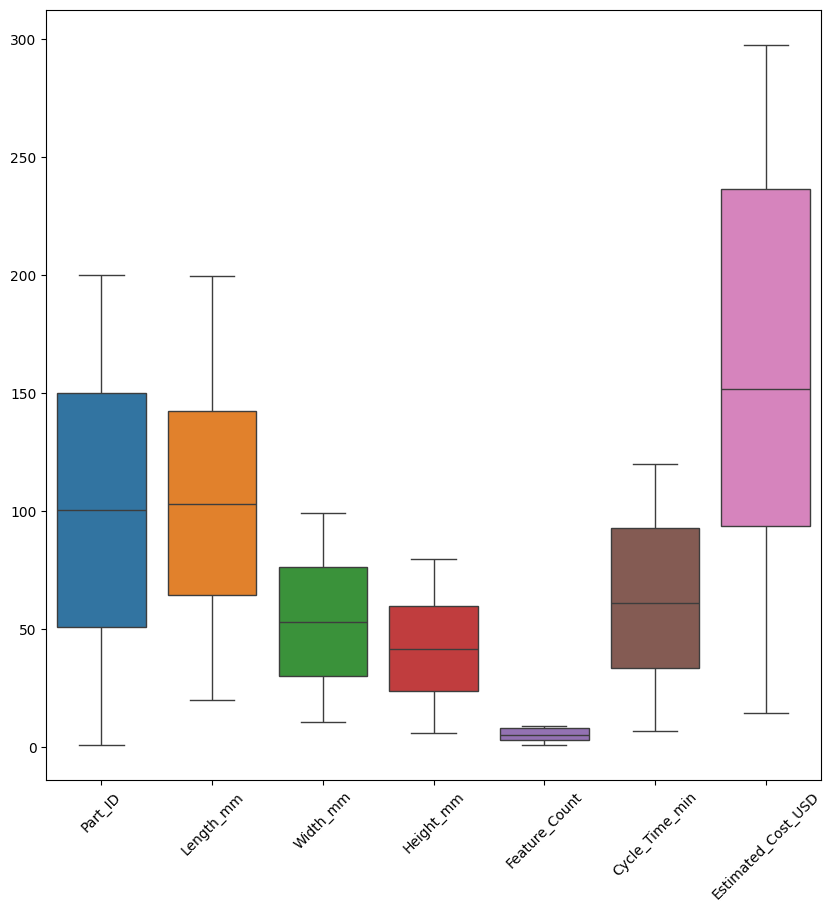

In [89]:
#Check for the outliers
plt.figure(figsize=(10,10))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.show()

In [90]:
#Check for the null values
df.isnull().sum()


,0
Part_ID,0
Material,0
Length_mm,0
Width_mm,0
Height_mm,0
Feature_Count,0
Cycle_Time_min,0
Estimated_Cost_USD,0


In [91]:
#Check for the duplictes
df[df.duplicated()]

,Part_ID,Material,Length_mm,Width_mm,Height_mm,Feature_Count,Cycle_Time_min,Estimated_Cost_USD


1.Here I basically check the data weather it contains the null value or duplicte value.

2.And also I had check the oulier and also the data type ,statistic summary.


In [92]:
#Feature engineering
df['Volume of Material']=df['Length_mm']*df['Height_mm']*df['Length_mm']
df[0:4]

,Part_ID,Material,Length_mm,Width_mm,Height_mm,Feature_Count,Cycle_Time_min,Estimated_Cost_USD,Volume of Material
0,1,Aluminum,99.9,25.9,41.6,2,50.5,164.70,415168.416
1,2,Steel,105.1,42.3,31.8,7,84.2,232.73,351263.118
2,3,Titanium,21.8,98.6,18.8,3,118.6,295.08,8934.512
3,4,Plastic,73.9,68.3,67.0,4,111.3,116.83,365901.070


In [93]:
df['Cost per mm³']=df['Estimated_Cost_USD']/df['Volume of Material']
df[0:4]

,Part_ID,Material,Length_mm,Width_mm,Height_mm,Feature_Count,Cycle_Time_min,Estimated_Cost_USD,Volume of Material,Cost per mm³
0,1,Aluminum,99.9,25.9,41.6,2,50.5,164.70,415168.416,0.000397
1,2,Steel,105.1,42.3,31.8,7,84.2,232.73,351263.118,0.000663
2,3,Titanium,21.8,98.6,18.8,3,118.6,295.08,8934.512,0.033027
3,4,Plastic,73.9,68.3,67.0,4,111.3,116.83,365901.070,0.000319


In [94]:
density_map = {
    'Aluminum': 2.7e-6,
    'Steel': 7.85e-6,
    'Titanium': 4.5e-6,
    'Plastic': 1.2e-6  # average value
}

df['Density'] = df['Material'].apply(lambda x: density_map.get(x, None))
df[0:4]
df['Mass']=df['Density']*df['Volume of Material']
df[0:4]

,Part_ID,Material,Length_mm,Width_mm,Height_mm,Feature_Count,Cycle_Time_min,Estimated_Cost_USD,Volume of Material,Cost per mm³,Density,Mass
0,1,Aluminum,99.9,25.9,41.6,2,50.5,164.70,415168.416,0.000397,0.000003,1.120955
1,2,Steel,105.1,42.3,31.8,7,84.2,232.73,351263.118,0.000663,0.000008,2.757415
2,3,Titanium,21.8,98.6,18.8,3,118.6,295.08,8934.512,0.033027,0.000005,0.040205
3,4,Plastic,73.9,68.3,67.0,4,111.3,116.83,365901.070,0.000319,0.000001,0.439081


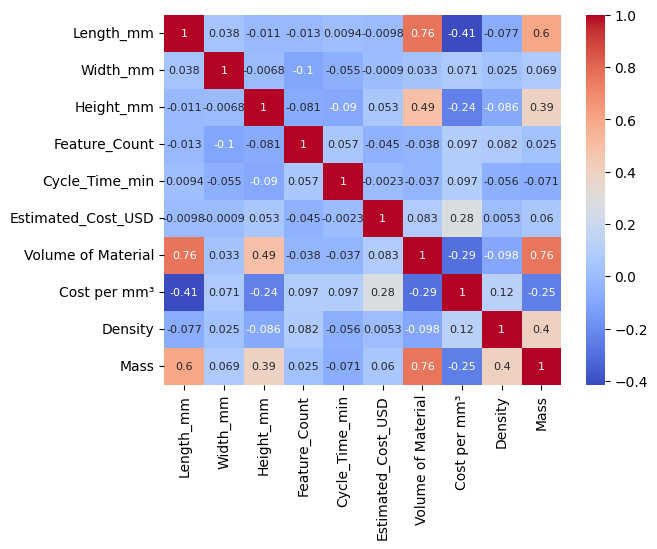

In [95]:
#Check the corellation of the data
numeric=df.iloc[:,2:]
sns.heatmap(numeric.corr(),annot=True,cmap='coolwarm',fmt=".2g",annot_kws={"size":8})
plt.show()


From the above chart we come to know some of the columns in the data are highly corelated with each other like volume and mass,followed by the cucl_time and cost per mm.

The reason behind to calculate the corellation is the to check the "mulicolinearity" of the independent variable if the mulicolinearity of the independent variable is to high it would ver difficult for the model while predicting the output.

In [96]:
df[0:4]

,Part_ID,Material,Length_mm,Width_mm,Height_mm,Feature_Count,Cycle_Time_min,Estimated_Cost_USD,Volume of Material,Cost per mm³,Density,Mass
0,1,Aluminum,99.9,25.9,41.6,2,50.5,164.70,415168.416,0.000397,0.000003,1.120955
1,2,Steel,105.1,42.3,31.8,7,84.2,232.73,351263.118,0.000663,0.000008,2.757415
2,3,Titanium,21.8,98.6,18.8,3,118.6,295.08,8934.512,0.033027,0.000005,0.040205
3,4,Plastic,73.9,68.3,67.0,4,111.3,116.83,365901.070,0.000319,0.000001,0.439081


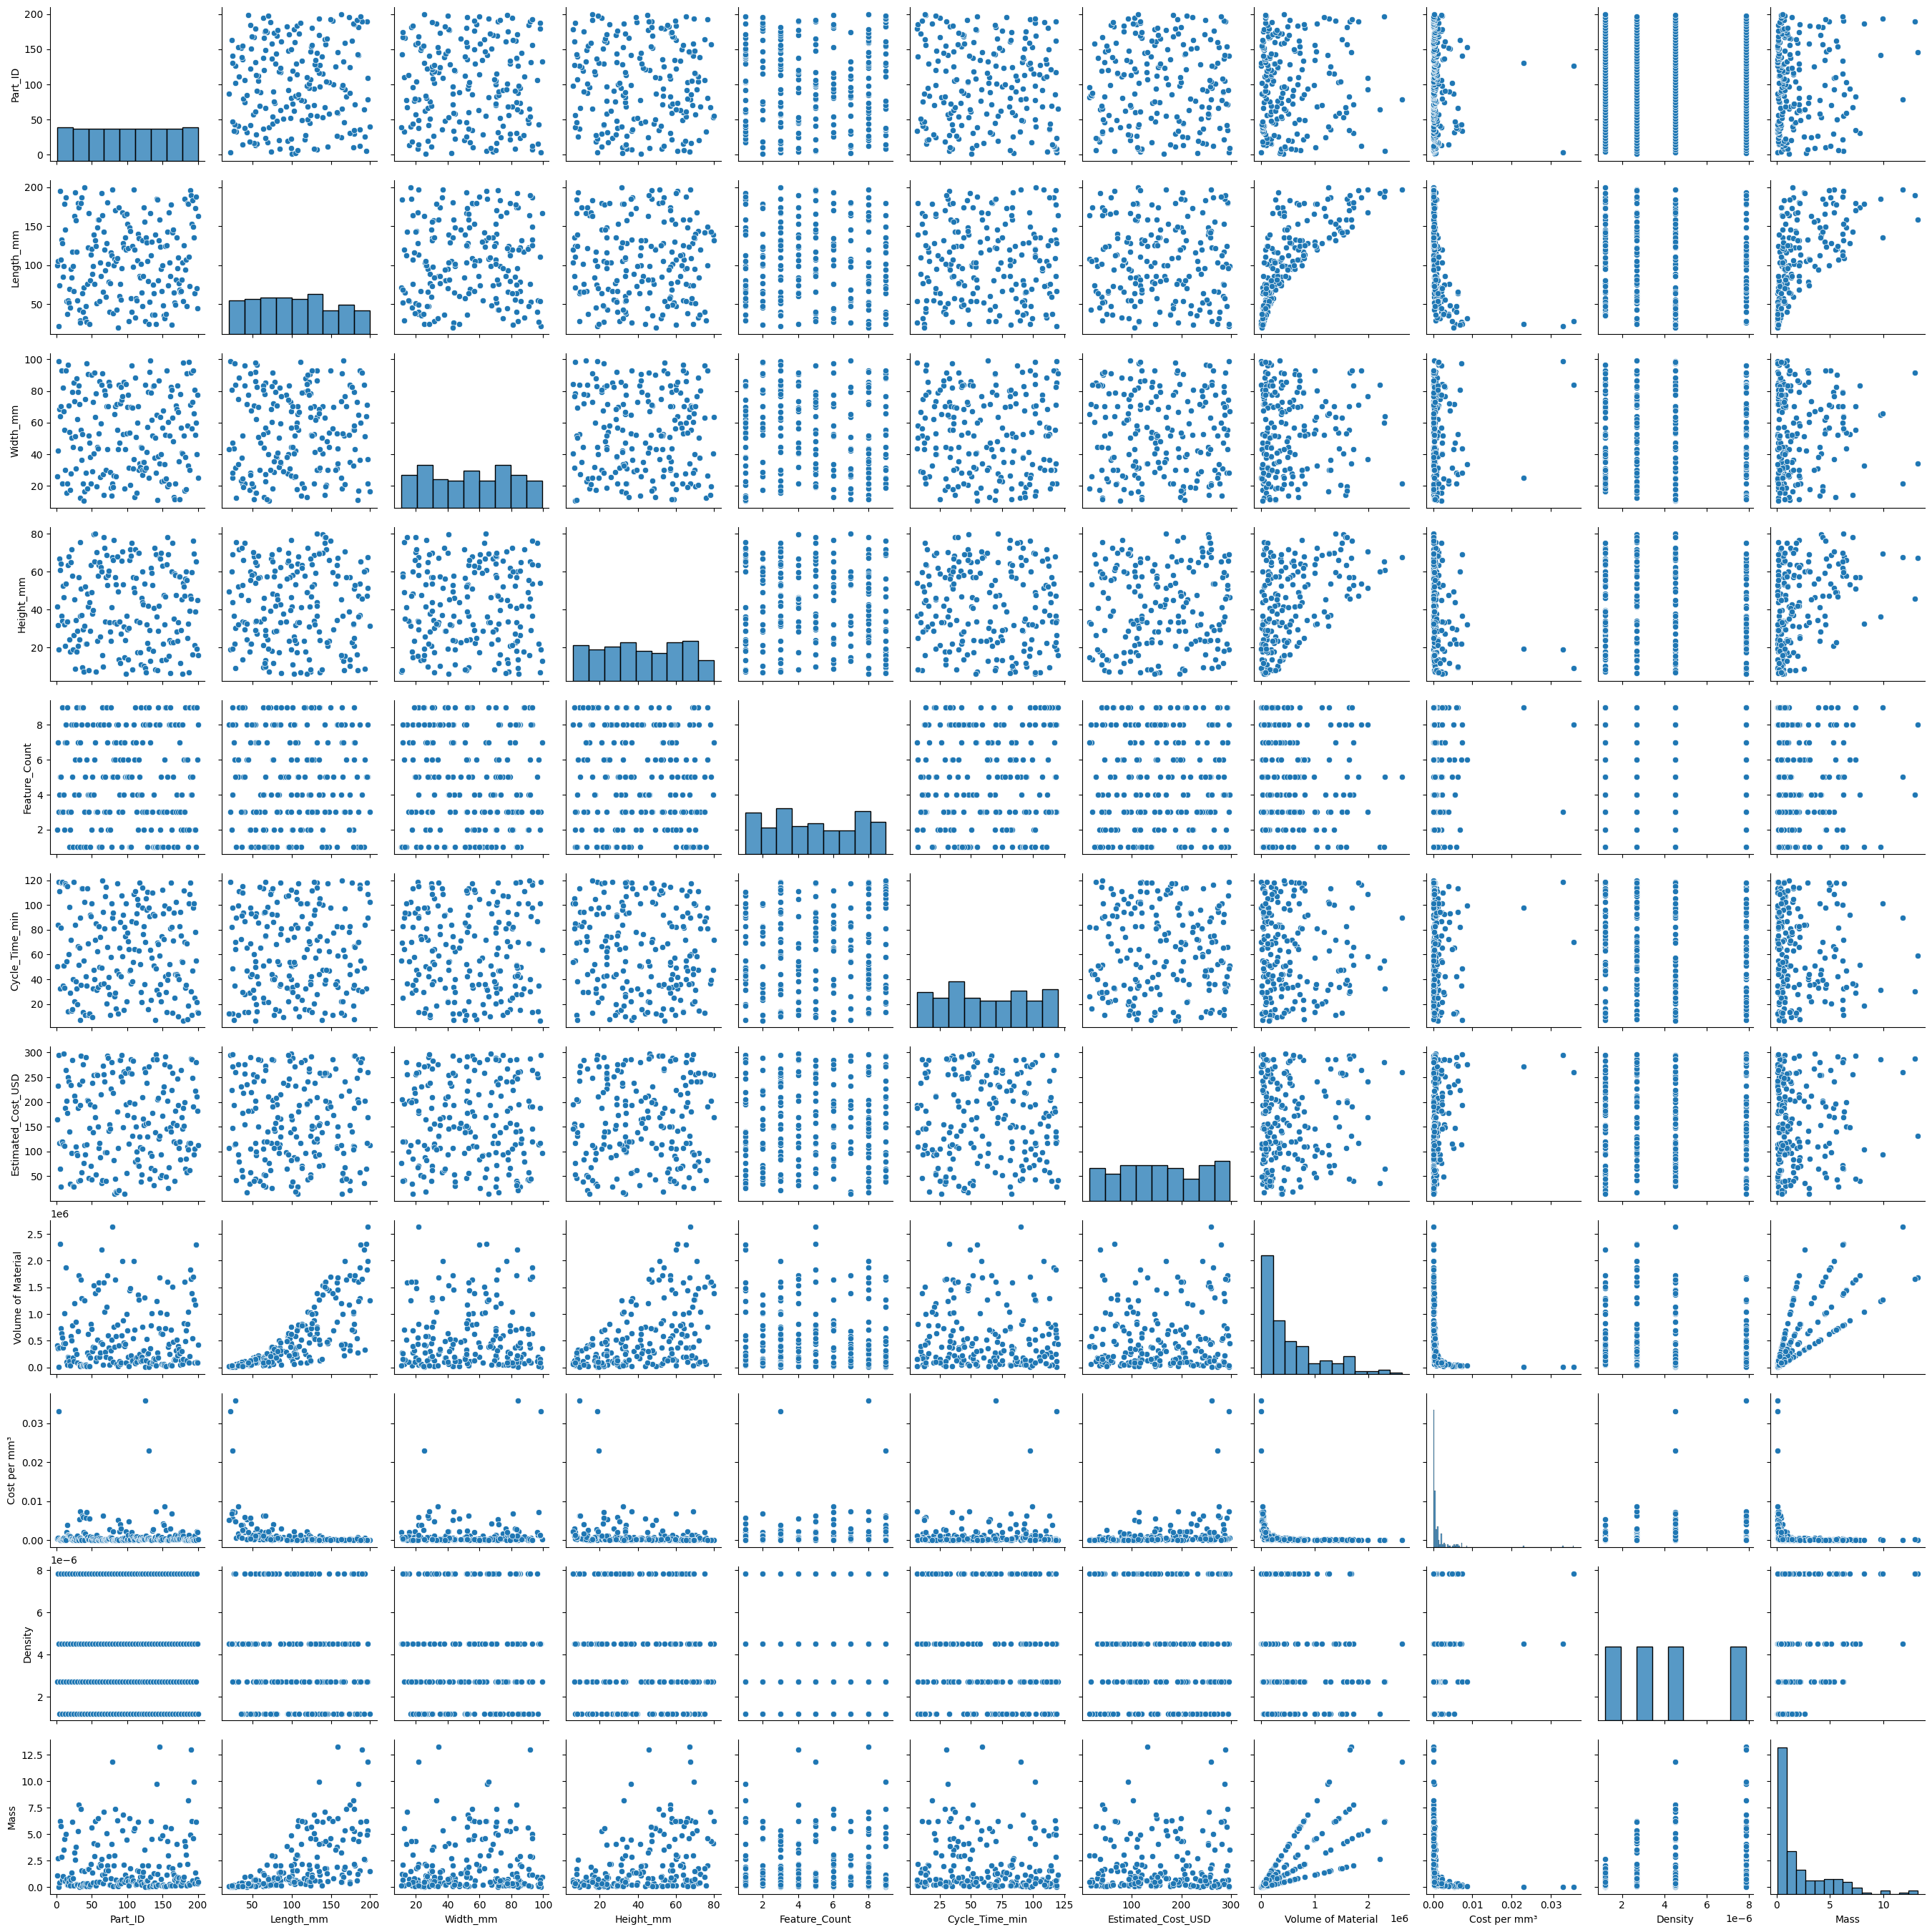

In [97]:
#Vizualization
import matplotlib.pyplot as plt
import seaborn as sas
sns.pairplot(df)
plt.show()

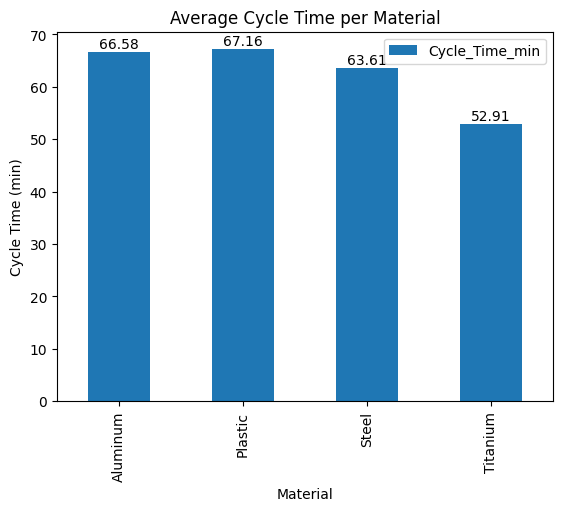

In [98]:
#Cycle_Time_min V/S  Mateial
avg_cycle_time = df.groupby('Material')['Cycle_Time_min'].mean()
df.groupby('Material')['Cycle_Time_min'].mean().plot(kind='bar')
plt.ylabel('Cycle Time (min)')
plt.title('Average Cycle Time per Material')
plt.legend()
for i, value in enumerate(avg_cycle_time):
    plt.text(i, value+0.1, f'{value:.2f}', ha='center', va='bottom')
plt.show()


Text(0, 0.5, 'Volume of Material')

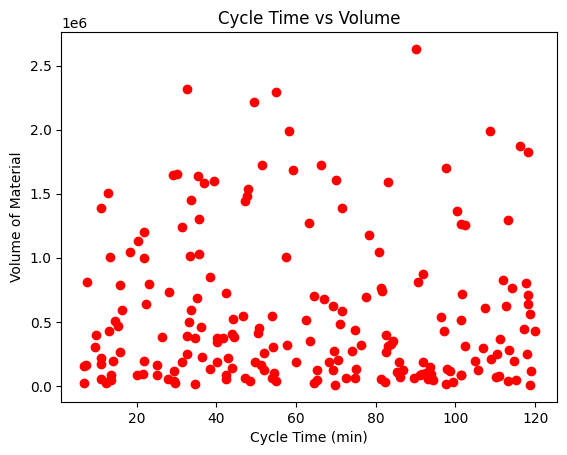

In [99]:
#Cycle_Time_min V/S Volume
plt.plot(df['Cycle_Time_min'],df['Volume of Material'],'o',color='red')
plt.title('Cycle Time vs Volume')
plt.xlabel('Cycle Time (min)')
plt.ylabel('Volume of Material')

Text(0, 0.5, 'Feature Count')

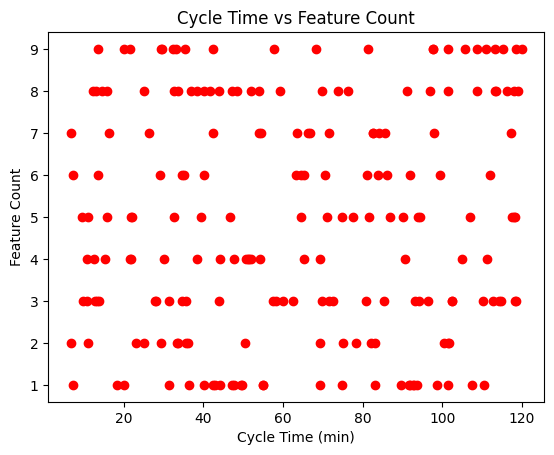

In [100]:
#Cycle_Time_min V/S Feature Count
plt.plot(df['Cycle_Time_min'],df['Feature_Count'],'o',color='red')
plt.title('Cycle Time vs Feature Count')
plt.xlabel('Cycle Time (min)')
plt.ylabel('Feature Count')

In [101]:
#Rename the column Estimated_Cost_USD
df.rename(columns={'Estimated_Cost_USD':'Cost'},inplace=True)
df[0:4]

,Part_ID,Material,Length_mm,Width_mm,Height_mm,Feature_Count,Cycle_Time_min,Cost,Volume of Material,Cost per mm³,Density,Mass
0,1,Aluminum,99.9,25.9,41.6,2,50.5,164.70,415168.416,0.000397,0.000003,1.120955
1,2,Steel,105.1,42.3,31.8,7,84.2,232.73,351263.118,0.000663,0.000008,2.757415
2,3,Titanium,21.8,98.6,18.8,3,118.6,295.08,8934.512,0.033027,0.000005,0.040205
3,4,Plastic,73.9,68.3,67.0,4,111.3,116.83,365901.070,0.000319,0.000001,0.439081


In [102]:
#Before splitt the data into train and test scale the model ,scalling as #been done because each and every
#parameter in the column are in the different units so we have bring them into same unit for better analysis
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
scaled_values=sc.fit_transform(df.drop('Material',axis=1))


In [103]:
#Decode the Material column
df['Material']=df['Material'].map({'Aluminum':0,'Steel':1,'Titanium':2,'Plastic':3})
df[0:4]

,Part_ID,Material,Length_mm,Width_mm,Height_mm,Feature_Count,Cycle_Time_min,Cost,Volume of Material,Cost per mm³,Density,Mass
0,1,0,99.9,25.9,41.6,2,50.5,164.70,415168.416,0.000397,0.000003,1.120955
1,2,1,105.1,42.3,31.8,7,84.2,232.73,351263.118,0.000663,0.000008,2.757415
2,3,2,21.8,98.6,18.8,3,118.6,295.08,8934.512,0.033027,0.000005,0.040205
3,4,3,73.9,68.3,67.0,4,111.3,116.83,365901.070,0.000319,0.000001,0.439081


In [104]:
#Split the data into two parts to predict the cost
from sklearn.model_selection import train_test_split
x=df.drop(['Cost'],axis=1) #independent parameter
y=df['Cost']#dependent parameter

In [105]:
#Use linerregression model beasuse the value is continues
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [106]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [107]:
lr.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [108]:
#Check the model Coefficents
lr.coef_

array([ 7.60226106e-02, -5.28695982e+00,  2.03583961e-01, -1.34019169e-01,
       -3.36466525e-02, -1.67219552e+00, -4.06870586e-02,  1.01295021e-05,
        8.70506593e+03, -9.83137818e+05,  7.09596264e-01])

In [109]:
y_predict=lr.predict(x_test)

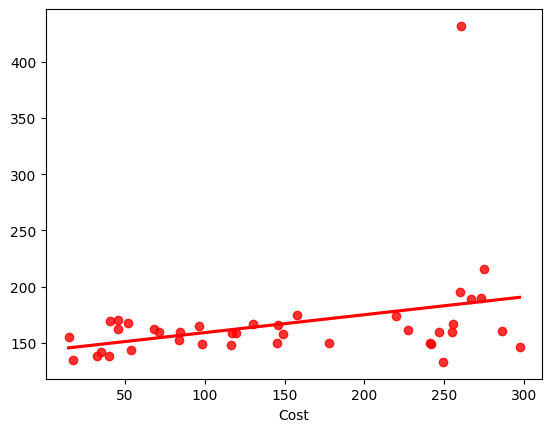

In [110]:
#Actual Data and Predicted Data by using regplot(it will give the best line passing tright the data points having minimum distance)
sns.regplot(x=y_test,y=y_predict,ci=None,color='red')
plt.show()


In [111]:
#Create the tabel for the Actual Cost and the Predicted Cost
result_df=pd.DataFrame({'Actual Cost':y_test,'Predicted Cost':y_predict})
result_df
#Now add the column of the erroe(which means the difference between the actual and predected ones)
result_df['Error_Manual']=result_df['Predicted Cost']-result_df['Actual Cost']
result_df
#Calculate tehe mean absolute error
from sklearn.metrics import mean_absolute_error
mae=mean_absolute_error(y_test,y_predict)
print('Mean Absolute Error:',mae)
#Calculate root mean square error
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,y_predict)
rmse=np.sqrt(mse)
print('Root Mean Square Error:',rmse)

Mean Absolute Error: 80.88779778227578
Root Mean Square Error: 90.13618820890852


In [112]:
#Now check for the R_square and adjecent R_square
from sklearn.metrics import r2_score
r2=r2_score(y_test,y_predict)
print('R Square:',r2)
adj_r2=1-(1-r2)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)
print('Adjusted R Square:',adj_r2)

R Square: 0.03818441273486606
Adjusted R Square: -0.3396717108335794


Key Difference from R-squared:
R² always increases when you add more features—even if they’re irrelevant.

Adjusted R² penalizes unnecessary features by adjusting for the number of predictors.

1.What challenges did you face?

*. First the problem I faced that is the gathering of the data from the scouece.

*.The data that I recived is full of the errors and missing values and wrong data types.

*.Outlier dectections and replace with upper and lower limit.

*.Next encodeing the catgorical data for the becuse the model will accept the numeric data.

*.Feature selection which means adding additional column which give more weightage to the give data.

*.Detect which columns has more colinearity feature.


2.How would you improve predictions with more data or domain knowledge?
*.Alway use the liear data set

*.Make shower that there is no multicolinearity between the independent columns.

*.Hence make shure that there is a colinearity betweenthe independet column and the target column.

*.Make shure there will be no error in the data treat the data before use fit it into the model.

*.Try various combination of the model will give the best result.

*.Try to reduce the dimensionality make sure to keep those feature that can explain the entire data use PCA(Principal comonent analysis) which make data so simple and reduce the complexity and overfitting.







Try various combination of the model

In [113]:
import statsmodels.formula.api as smf
df[0:4]

,Part_ID,Material,Length_mm,Width_mm,Height_mm,Feature_Count,Cycle_Time_min,Cost,Volume of Material,Cost per mm³,Density,Mass
0,1,0,99.9,25.9,41.6,2,50.5,164.70,415168.416,0.000397,0.000003,1.120955
1,2,1,105.1,42.3,31.8,7,84.2,232.73,351263.118,0.000663,0.000008,2.757415
2,3,2,21.8,98.6,18.8,3,118.6,295.08,8934.512,0.033027,0.000005,0.040205
3,4,3,73.9,68.3,67.0,4,111.3,116.83,365901.070,0.000319,0.000001,0.439081


In [114]:
model1=smf.ols('Cost~Material+Length_mm+Width_mm+Height_mm',data=df).fit()
print('Absolute mean square error is:',model1.mse_resid)
print('R square is:',model1.rsquared)
print('Adjusted R square is:',model1.rsquared_adj)

Absolute mean square error is: 6980.213601591295
R square is: 0.009371003483492624
Adjusted R square is: -0.010949591316845808


In [115]:
df = df.rename(columns={'Volume of Material': 'Volume'})

import statsmodels.formula.api as smf

model2 = smf.ols('Cost ~ Feature_Count + Cycle_Time_min + Volume', data=df).fit()

print('Mean Squared Error:', model2.mse_resid)
print('R-squared:', model2.rsquared)
print('Adjusted R-squared:', model2.rsquared_adj)


Mean Squared Error: 6949.352346368746
R-squared: 0.008693131821312594
Adjusted R-squared: -0.006479932487544859


In [116]:
# Rename problematic column
df = df.rename(columns={'Cost per mm³': 'Cost_per_mm3'})

# Fit the model
import statsmodels.formula.api as smf

model3 = smf.ols('Cost ~ Cost_per_mm3 + Density + Mass', data=df).fit()

print('Mean Squared Error:', model3.mse_resid)
print('R-squared:', model3.rsquared)
print('Adjusted R-squared:', model3.rsquared_adj)


Mean Squared Error: 6285.467500945729
R-squared: 0.10339456213394715
Adjusted R-squared: 0.08967100951354834


As compair to above ,I would suggest the 3rd model is suitable has it has less mean square error